In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/df_rr.csv'

df_rr = pd.read_csv(url)
df_rr["DATE"] = pd.to_datetime(df_rr["DATE"],dayfirst=True)
for col in df_rr.columns[1:]:
    df_rr[col] = pd.to_numeric(df_rr[col],errors='coerce')

print(df_rr)

           DATE     WTI_HH   NCF_RCF   NCF_WTI     NCF_HH    NCF_NBP  \
0    2009-01-05   8.337907  0.920024  1.597408  13.319039   9.317755   
1    2009-01-06   7.960656  0.918079  1.673188  13.319672   9.094982   
2    2009-01-07   7.258065  0.911884  1.839766  13.353141   8.969184   
3    2009-01-08   6.993289  0.942262  1.898992  13.280201   9.340782   
4    2009-01-09   7.266071  0.920958  1.889899  13.732143   9.019865   
...         ...        ...       ...       ...        ...        ...   
2850 2020-08-25  16.996063  1.017382  1.152421  19.586614  15.375235   
2851 2020-08-26  17.146825  1.015322  1.150197  19.722222  15.008563   
2852 2020-08-27  17.015873  1.018405  1.161381  19.761905  14.134232   
2853 2020-08-28  17.463415  0.969349  1.177840  20.569106  13.098330   
2854 2020-08-31  18.526087  0.982042  1.219197  22.586957  13.412611   

         NCF_B     RCF_B    RCF_NBP     WTI_B  ...  NCF_RCF_r  NCF_WTI_r  \
0     1.564893  1.700927  10.127733  0.979645  ...   0.0023

In [7]:
## markov regime switching for price ratio returns ##

mod = sm.tsa.MarkovRegression(df_rr['NCF_HH'], k_regimes=3, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1287: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  EstimationWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1287: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  EstimationWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1287: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  EstimationWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1287: EstimationWarning: Invalid regime transition prob

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 NCF_HH   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               -8405.094
Date:                Mon, 02 Aug 2021   AIC                          16834.188
Time:                        17:23:50   BIC                          16905.670
Sample:                             0   HQIC                         16859.965
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6800      0.091    105.821      0.000       9.501       9.859
sigma2         0.0308      0.023      1.363      0.173      -0.013       0.075
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7159      0.102    202.121      0.000      20.515      20.917
sigma2        10.6353      0.442     24.079      0.000       9.770      11.501
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8332      0.167    196.285      0.000      32.505      33.161
sigma2        34.3831      1.286     26.737      0.000      31.863      36.904
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.2594        nan        nan        nan         nan         nan
p[1->0]        0.0020      0.001      1.606      0.108      -0.000       0.005
p[2->0]       4.7e-11        nan        nan        nan         nan         nan
p[0->1]        0.7406        nan        nan        nan         nan         nan
p[1->1]        0.9900      0.003    356.390      0.000       0.985       0.995
p[2->1]        0.0078      0.002      3.337      0.001       0.003       0.012
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

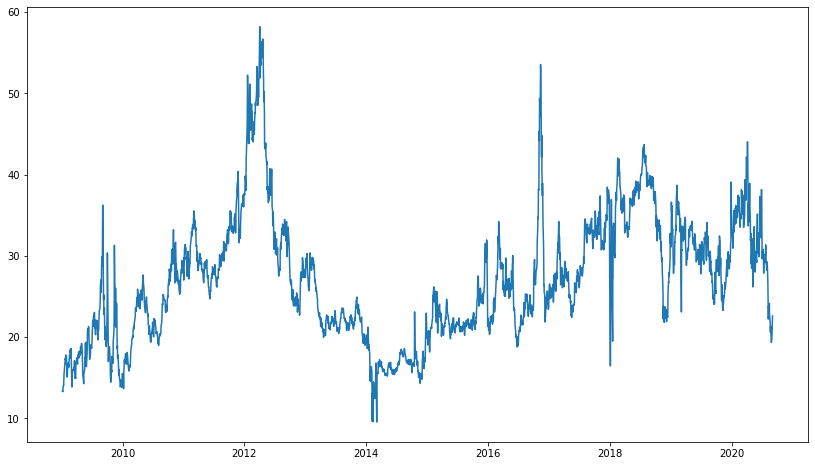

In [6]:
plt.figure(figsize=(14,8)) 
plt.plot(df_rr["DATE"],df_rr["NCF_HH"])